Generate Data Function

In [1]:
import random
import time
import pandas as pd

random.seed(time.time())

def generateData(size, dimension=2, linearly_separable=True, min_dist_btwn_points=10):
    data = [[0 for x in range(dimension)] for y in range(size)] 
    
    # Initialize points and their values
    for i in range(size):

        #Create random data point
        data[i][0] = random.randint(1,100)
        data[i][1] = random.randint(1,100)

        while(abs(data[i][0] - data[i][1]) <= min_dist_btwn_points):
            #do it again, we don't want it too close to the line
            data[i][0] = random.randint(1,100)
            data[i][1] = random.randint(1,100)

        # Point's position relative to x = y line determines value        
        if (data[i][0] >=  data[i][1]):
            data[i].append(1)
        else:
            data[i].append(-1)

        # unless we don't want it to be specifically linearly separable
        # then 10% of the time switch the value up
        if (not linearly_separable and random.randint(1,10) % 10):
            data[i][2] *= -1

    return data

Generate Training Data

AxesSubplot(0.125,0.125;0.62x0.755)


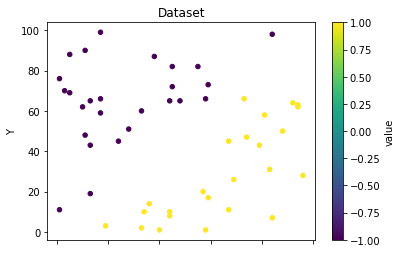

In [2]:
data = generateData(50, min_dist_btwn_points=5)

df = pd.DataFrame(data, columns=("X", "Y", "value"))
print(df.plot.scatter(x="X", y="Y", c="value", cmap='viridis', title='Dataset'))
#print(df.to_string(index=False))

PLA Algorithm

In [3]:
import numpy as np
def pla(x, y, step_size, passes):
    w=[0,0,0] #initialize to zero vector
    for c in range(passes):
        
        updated = False
        for i in range(len(x)):
            if y[i] * np.dot(w, x[i]) <= 0:
                update = [step_size * y[i] * point for point in x[i]]
                w = [sum(i) for i in zip(*[w,update])] #returns a vector of the sums of corresponding values in each vector (w and update) 
                updated = True
        
        if not updated:
            break
    
    if updated == False:
        print("First solution found.")
    else:
        print("No solution or first solution found but not verified in the last pass.")
    return w
                    

Run PLA algorithm on Training Data

In [4]:
import numpy as np
#separate the points from values for sake of pla
values=[]
points=[]
for i in range(len(data)):
    values.append(data[i][2])
    points.append([1, data[i][0], data[i][1]]) #1 is neeeded as the first component before the points, per PLA
    
result = pla(points, values, 1, 100)
print(result)

First solution found.
[1, 189, -195]


Plot Training Results

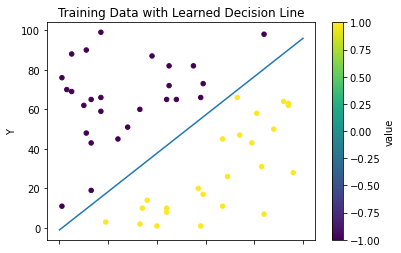

In [5]:
import matplotlib.pyplot as plt
import pandas as pd

#plot data
df = pd.DataFrame(data, columns=("X", "Y", "value"))
df.plot.scatter(x="X", y="Y", c="value", cmap='viridis', title='Training Data with Learned Decision Line')


# plot decision line by choosing 2 arbritray x coodinates and calculating their y value based on the weights
# weights[0] + weights[1]*(x) + weights[2]*(y) = 0
x1 = 0 
x2 = 100
plt.plot([x1,x2],[((-1*result[0]) - result[1]*x1 / result[2]),((-1*result[0]) - result[1]*x2 / result[2])]) 


Generate Test Data and Plot

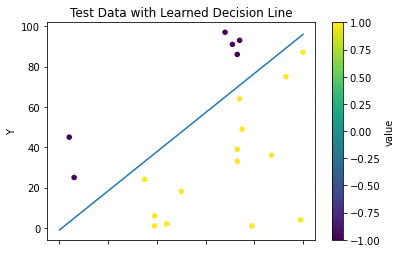

In [6]:
testData = generateData(20, min_dist_btwn_points=5)

#plot data
df = pd.DataFrame(testData, columns=("X", "Y", "value"))
df.plot.scatter(x="X", y="Y", c="value", cmap='viridis', title='Test Data with Learned Decision Line')

# plot decision line by choosing 2 arbritray x coodinates and calculating their y value based on the weights
# weights[0] + weights[1]*(x) + weights[2]*(y) = 0
x1 = 0 
x2 = 100
plt.plot([x1,x2],[((-1*result[0]) - result[1]*x1 / result[2]),((-1*result[0]) - result[1]*x2 / result[2])]) 